## In-depth Introduction
First let's import the module and create an environment.

In [3]:
from kaggle.competitions import twosigmanews
# You can only call make_env() once, so don't lose it!
env = twosigmanews.make_env()

Exception: You can only make one environment for this competition.

## **`get_training_data`** function

Returns the training data DataFrames as a tuple of:
* `market_train_df`: DataFrame with market training data
* `news_train_df`: DataFrame with news training data

These DataFrames contain all market and news data from February 2007 to December 2016.  See the [competition's Data tab](https://www.kaggle.com/c/two-sigma-financial-news/data) for more information on what columns are included in each DataFrame.

In [4]:
(market_train_df, news_train_df) = env.get_training_data()

In [ ]:
market_train_df.head()

In [ ]:
market_train_df.tail()

In [ ]:
news_train_df.head()

In [ ]:
news_train_df.tail()

In [ ]:
news_train_df.iloc[-10:]

In [ ]:
#divide into 3 classes
from scipy.stats import describe
import numpy as np
import matplotlib.pyplot as plt
returns = market_train_df['returnsOpenNextMktres10']
valid_idx = np.abs(returns) < 0.4
valid_returns = returns[valid_idx]
market_train_df = market_train_df[valid_idx]
print(describe(returns))
cutoff_1 = valid_returns.quantile(0.33)
cutoff_2 = valid_returns.quantile(0.66)
return_class = np.zeros(market_train_df.shape[0])
return_class[valid_returns < cutoff_1] = -1
return_class[valid_returns > cutoff_2] = 1
market_train_df['class'] = return_class
market_train_df.drop(columns = ['returnsClosePrevMktres10', 'returnsOpenPrevMktres10'])
print ('Done')

In [ ]:
print(len(valid_returns))
len(returns)

In [ ]:
import pandas as pd

#First, assign label to each piece of news
#The label is the accumulated return over the next 10 business days after the news is released
text = news_train_df['headline']
num_rows = news_train_df.shape[0]
labels = np.ones(num_rows)
for i in range(num_rows):
    x = news_train_df.iloc[i]
    tmp = market_train_df[(market_train_df['time'] > x['time']) & (market_train_df['assetCode'].isin(list(eval(x['assetCodes']))))]
    tmp = tmp[np.asarray([diff.days for diff in tmp.time - x.time]) <= 10]
    labels[i] = np.prod([(1+num) for num in tmp.returnsOpenNextMktres10]) 
print ('Done')

In [ ]:
#Encode the news data
import chakin
# chakin.search(lang="English")
chakin.download(number=21)
print ('Done')

In [ ]:
import pandas as pd
basic = pd.read_csv('../input/sector/basic industries.csv')['Symbol']
capital = pd.read_csv('../input/sector/capital_goods.csv')['Symbol']
prod = pd.read_csv('../input/sector/consumer products.csv')['Symbol']
service = pd.read_csv('../input/sector/consumer service.csv')['Symbol']
energy = pd.read_csv('../input/sector/energy.csv')['Symbol']
finance = pd.read_csv('../input/sector/finance.csv')['Symbol']
healthcare = pd.read_csv('../input/sector/healthcare.csv')['Symbol']
misc = pd.read_csv('../input/sector/miscellaneous.csv')['Symbol']
tech = pd.read_csv('../input/sector/technology.csv')['Symbol']
transport = pd.read_csv('../input/sector/transportation.csv')['Symbol']
utility = pd.read_csv('../input/sector/utilities.csv')['Symbol']
sectors = [basic, capital, prod, service, energy, finance, healthcare, misc,
          tech, transport, utility]
print ('Done')

In [ ]:
#sector name cleaning
for i, sec in enumerate(sectors):
    for j, name in enumerate(sec):
        sectors[i][j] = sectors[i][j].strip()
    sectors[i] = set(sectors[i])
print ('Done')

In [ ]:
import numpy as np
sectorMapping = dict()
num_rows = market_train_df.shape[0]
industry_class = np.zeros(num_rows)
for i in range(num_rows):
    if i % 500000 == 0:
        print ('step ' + str(i//500000) + ' is done')
    name = market_train_df.loc[i, 'assetCode']
    name = name[:name.find('.')] if name.find('.') != -1 else name
    existed = False
    for j, sec in enumerate(sectors):
        if name in sec:
            industry_class[i] = j + 1
            sectorMapping[name] = j + 1
            existed = True
            break
    if existed == False:
        sectorMapping[name] = 0
print ('Done')

In [ ]:
import pickle
with open('sectorMapping.pkl','wb') as f:
    pickle.dump(sectorMapping, f, pickle.HIGHEST_PROTOCOL)
print ('Done')

In [ ]:
with open('sectorMapping.pkl', 'rb') as f:
    x = pickle.load(f)
print ('Done')

In [ ]:
import matplotlib.pyplot as plt
plt.hist(industry_class)

In [ ]:
#industry classification for news data
import numpy as np
topic_codes = news_train_df['subjects']
industry_codes = set(["ADV","APL","BIOT","BUS","DPR","ELI","GDM","IND",
                      "MAC","MUL","REAM","RRL","STL","TEX","WWW",
                      "AER","AUT","BLD","CHE","DRU","FIN","GSFT",
                      "INS","MET","PUB","REC","SHP","TEL","TIM",
                      "AIR","BEV","BNK","CON","ELC","FOD","HDWR",
                      "LEI","MIS","REA","RET","SFWR","TBCS","WHO"])

sectors = [basic, capital, prod, service, energy, finance, healthcare, misc,
          tech, transport, utility]

GICS = ['Communication services','Consumer discretionary','Consumer staples','Energy','Financials',
        'Health care','Industrials','Information technology','Materials','Real estate','Utilities']

com = ['ELC','TEL']
disc = ['ADV','APL','AUT','LEI','PUB','REC','RET','TBCS','TEX']
staples = ['BEV','FOD',] 
energy = ['ENR','ENQ',]
fin = ['BNK','FIN','INS']
health = ['BIOT','DRU',]
ind = ['AER','AIR','BLD','BUS','CON','IND','RRL','SHP','WHO']
info = ['DPR','ELI','GSFT','HDWR','SFWR','WWW']
material = ['CHE','GDM','MAC','MET','MIS','STL','TIM',]
estate = ['REA','REAM']
util = ['ELG']
general = ['MUL']
sector_list = [com,disc,staples,energy,fin,health,ind,info,material,
              estate,util]
industry_class = np.zeros(len(topic_codes))
for i,topic in enumerate(topic_codes):
    for j,sector_codes in enumerate(sector_list):
        if topic in sector_codes:
            industry_class[i] = j + 1
print ('Done')


In [6]:
news_train_df.head()

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,bodySize,companyCount,headlineTag,marketCommentary,sentenceCount,wordCount,assetCodes,assetName,firstMentionSentence,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,sentimentWordCount,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
0,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil i...,3,1,RTRS,"{'ENR', 'ASIA', 'CN', 'NGS', 'EMRG', 'RTRS', '...","{'Z', 'O', 'OIL'}",1438,1,,False,11,275,"{'0857.HK', '0857.F', '0857.DE', 'PTR.N'}",PetroChina Co Ltd,6,0.235702,-1,0.500739,0.419327,0.079934,73,0,0,0,0,0,0,0,3,6,7
1,2007-01-01 07:03:35+00:00,2007-01-01 07:03:34+00:00,2007-01-01 07:03:34+00:00,5a31c4327427f63f,"FEATURE-In kidnapping, finesse works best",3,1,RTRS,"{'FEA', 'CA', 'LATAM', 'MX', 'INS', 'ASIA', 'I...","{'PGE', 'PCO', 'G', 'ESN', 'MD', 'PCU', 'DNP',...",4413,1,FEATURE,False,55,907,{'STA.N'},Travelers Companies Inc,8,0.447214,-1,0.600082,0.345853,0.054064,62,1,1,1,1,1,1,1,3,3,3
2,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,1cefd27a40fabdfe,PRESS DIGEST - Wall Street Journal - Jan 1,3,1,RTRS,"{'RET', 'ENR', 'ID', 'BG', 'US', 'PRESS', 'IQ'...","{'T', 'DNP', 'PSC', 'U', 'D', 'M', 'RNP', 'PTD...",2108,2,PRESS DIGEST,False,15,388,"{'WMT.DE', 'WMT.N'}",Wal-Mart Stores Inc,14,0.377964,-1,0.450049,0.295671,0.254280,67,0,0,0,0,0,0,0,5,11,17
3,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'B...","{'T', 'DNP', 'PSC', 'U', 'D', 'M', 'RNP', 'PTD...",1776,6,PRESS DIGEST,False,14,325,"{'GOOG.O', 'GOOG.OQ', 'GOOGa.DE'}",Google Inc,13,0.149071,-1,0.752917,0.162715,0.084368,83,0,0,0,0,0,0,0,5,13,15
4,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'B...","{'T', 'DNP', 'PSC', 'U', 'D', 'M', 'RNP', 'PTD...",1776,6,PRESS DIGEST,False,14,325,{'XMSR.O'},XM Satellite Radio Holdings Inc,11,0.149071,-1,0.699274,0.209360,0.091366,102,0,0,0,0,0,0,0,0,0,0


In [31]:
#Construct novelty related factors
import numpy as np
from scipy.stats import describe
novelty0 = news_train_df['noveltyCount12H']
novelty1 = news_train_df['noveltyCount24H'] - news_train_df['noveltyCount12H']
novelty2 = news_train_df['noveltyCount3D'] - news_train_df['noveltyCount24H']
novelty3 = news_train_df['noveltyCount5D'] - news_train_df['noveltyCount3D']
novelty4 = news_train_df['noveltyCount7D'] - news_train_df['noveltyCount5D']
novelty = np.column_stack((novelty0,novelty1,novelty2,novelty3,novelty4))
t = np.array([0.25, 0.75, 2, 4, 6])
decay_novelty = - t * novelty
decay_novelty = np.sum(np.exp(decay_novelty), axis = 1)

volumn0 = news_train_df['volumeCounts12H']
volumn1 = news_train_df['volumeCounts24H'] - news_train_df['volumeCounts12H']
volumn2 = news_train_df['volumeCounts3D'] - news_train_df['volumeCounts24H']
volumn3 = news_train_df['volumeCounts5D'] - news_train_df['volumeCounts3D']
volumn4 = news_train_df['volumeCounts7D'] - news_train_df['volumeCounts5D']
volumn = np.column_stack((volumn0,volumn1,volumn2,volumn3,volumn4))
decay_volumn = - t * volumn
decay_volumn = np.sum(np.exp(decay_volumn), axis = 1)

info_novelty = describe(decay_novelty)
info_volumn = describe(decay_volumn)

print (describe(decay_novelty))
print (describe(decay_volumn))

print ('Done')

DescribeResult(nobs=9328750, minmax=(9.995705704761785e-09, 5.0), mean=4.60058717598803, variance=0.5314065756566537, skewness=-3.3361984203958133, kurtosis=13.687558154422085)
DescribeResult(nobs=9328750, minmax=(3.3427955219162848e-80, 5.0), mean=2.555924856047671, variance=2.5442995571699183, skewness=-0.11380412585219192, kurtosis=-1.2377537087664192)
Done


In [61]:
#Construct novelty-adjusted sentiment factor
cols = ['sentimentClass','sentimentNegative','sentimentNeutral','sentimentPositive']
df = news_train_df[cols]
df['decay_novelty'] = decay_novelty
df['sentimentClass'] += 1
print ('Done')

Done


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(array([2813011.,       0.,       0.,       0.,       0., 2899088.,
              0.,       0.,       0., 3616651.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

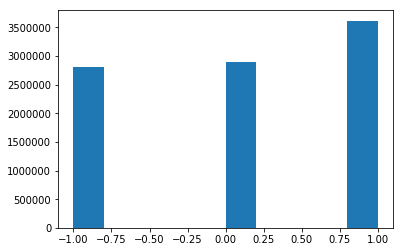

In [52]:
import matplotlib.pyplot as plt
plt.hist(news_train_df['sentimentClass'])

In [71]:
#Compute the novelty-adjusted sentiment score, which can be used as a news factor
def adjusted_score(info):
    avg = 4.600587
    std = 0.7289763889
    if info['sentimentClass'] == 1:
        return 0
    elif info['sentimentClass'] == 0 and info['decay_novelty'] > avg: #momentum 
        return info['sentimentNegative']
    elif info['sentimentClass'] == 0 and info['decay_novelty'] < avg - std: #reversion
        return -info['sentimentNegative']
    elif info['sentimentClass'] == 2 and info['decay_novelty'] > avg: #momentum 
        return info['sentimentPositive']
    elif info['sentimentClass'] == 2 and info['decay_novelty'] < avg - std: #reversion
        return -info['sentimentPositive']
    else: 
        return 0
    
adjusted_score = df.apply(adjusted_score, axis = 1)
print ('Done')    

Done


In [73]:
describe(adjusted_score)

DescribeResult(nobs=9328750, minmax=(-0.856939971446991, 0.856939971446991), mean=0.02010050459192407, variance=0.2619629977419411, skewness=-0.07086393921575833, kurtosis=-0.955395225256523)

In [ ]:
#check if every news data point has industry code
num_missing_ind = 0
idx = []
for i, val in enumerate(topic_codes):
    if i % 500000 == 0:
        print ("step " + str(i//500000) + " is done!")
    topics = eval(val)
    flag = False
    for item in topics:
        if item in industry_codes:
            flag = True
        if flag == True:
            continue
    if flag == False:
        num_missing_ind += 1
        idx.append(i)
print ('Done')
        

In [ ]:
len(idx)/len(topic_codes)
news_train_df.iloc[0]

i## `get_prediction_days` function

Generator which loops through each "prediction day" (trading day) and provides all market and news observations which occurred since the last data you've received.  Once you call **`predict`** to make your future predictions, you can continue on to the next prediction day.

Yields:
* While there are more prediction day(s) and `predict` was called successfully since the last yield, yields a tuple of:
    * `market_observations_df`: DataFrame with market observations for the next prediction day.
    * `news_observations_df`: DataFrame with news observations for the next prediction day.
    * `predictions_template_df`: DataFrame with `assetCode` and `confidenceValue` columns, prefilled with `confidenceValue = 0`, to be filled in and passed back to the `predict` function.
* If `predict` has not been called since the last yield, yields `None`.

In [ ]:
# You can only iterate through a result from `get_prediction_days()` once
# so be careful not to lose it once you start iterating.
days = env.get_prediction_days()

In [ ]:
(market_obs_df, news_obs_df, predictions_template_df) = next(days)

In [ ]:
market_obs_df.head()

In [ ]:
news_obs_df.head()

In [ ]:
predictions_template_df.head()

Note that we'll get an error if we try to continue on to the next prediction day without making our predictions for the current day.

In [ ]:
next(days)

### **`predict`** function
Stores your predictions for the current prediction day.  Expects the same format as you saw in `predictions_template_df` returned from `get_prediction_days`.

Args:
* `predictions_df`: DataFrame which must have the following columns:
    * `assetCode`: The market asset.
    * `confidenceValue`: Your confidence whether the asset will increase or decrease in 10 trading days.  All values must be in the range `[-1.0, 1.0]`.

The `predictions_df` you send **must** contain the exact set of rows which were given to you in the `predictions_template_df` returned from `get_prediction_days`.  The `predict` function does not validate this, but if you are missing any `assetCode`s or add any extraneous `assetCode`s, then your submission will fail.

Let's make random predictions for the first day:

In [ ]:
import numpy as np
def make_random_predictions(predictions_df):
    predictions_df.confidenceValue = 2.0 * np.random.rand(len(predictions_df)) - 1.0

In [ ]:
make_random_predictions(predictions_template_df)
env.predict(predictions_template_df)

Now we can continue on to the next prediction day and make another round of random predictions for it:

In [ ]:
(market_obs_df, news_obs_df, predictions_template_df) = next(days)

In [ ]:
market_obs_df.head()

In [ ]:
news_obs_df.head()

In [ ]:
predictions_template_df.head()

In [ ]:
make_random_predictions(predictions_template_df)
env.predict(predictions_template_df)

## Main Loop
Let's loop through all the days and make our random predictions.  The `days` generator (returned from `get_prediction_days`) will simply stop returning values once you've reached the end.

In [ ]:
for (market_obs_df, news_obs_df, predictions_template_df) in days:
    make_random_predictions(predictions_template_df)
    env.predict(predictions_template_df)
print('Done!')

## **`write_submission_file`** function

Writes your predictions to a CSV file (`submission.csv`) in the current working directory.

In [ ]:
env.write_submission_file()

In [ ]:
# We've got a submission file!
import os
print([filename for filename in os.listdir('.') if '.csv' in filename])

In [ ]:
# #Merge data set
# import pandas as pd
# import numpy as np
# from datetime import datetime
# import sys
# from functools import reduce


# # when debug mode is on, we only take a sub-sample of total data
# debug_mode = True
# # when we first load this in notebook, turn reload on. afterwards, turn it off no need to reload data everytime
# reload = False

# # if reload:
# #     news_train_dir = "./new_train_df.csv"
# #     news_train_df = pd.read_csv(news_train_dir)

# #     market_train_dir = "./market_train_df.csv"
# #     market_train_df = pd.read_csv(market_train_dir)

# # globals
# news_col_extractor = ["time", "assetCodes", "headline", "urgency", "takeSequence", 
#                     "subjects", "audiences", "relevance", 
#                     'sentimentClass','sentimentNegative', 'sentimentNeutral', 'sentimentPositive',
#                     'noveltyCount12H', 'noveltyCount24H', 'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 
#                     'volumeCounts12H','volumeCounts24H', 'volumeCounts3D', 'volumeCounts5D','volumeCounts7D'
#                    ]

# market_col_extractor = ["time", "assetCode", "volume", "close", "open", 
#                         "returnsClosePrevRaw1", "returnsOpenPrevRaw1", "returnsClosePrevRaw10", "returnsOpenPrevRaw10",
#                         "returnsOpenNextMktres10", "universe"]

# identity = lambda series: reduce(lambda x, y: x, series)
# coalesce = lambda x: list(x)

# if debug_mode:
#     news = news_train_df[60000:70000]
#     market = market_train_df[:5000]
# else:
#     news = news_train_df
#     market = market_train_df

# assetCode_set = set(market_train_df["assetCode"].unique())

# # extract relevant columns based on their descriptions
# def extract_df(news_train_df, market_train_df):
#     news_df = news_train_df[news_col_extractor]
#     market_df = market_train_df[market_col_extractor]
#     return news_df, market_df

# # given a dataframe with field time convert into datetime, month and week
# def extract_time_dependent_features(df, obj = None):
#     # 1. get date
#     df["datetime"] = df["time"].apply(lambda ts: ts[:10])
#     # 2. get month
#     if obj == "news":
#         return df
#     df["month"] = df["datetime"].apply(lambda ts: ts[5:7])
#     # 3. get week
#     df["week"] = df["datetime"].apply(lambda ts: datetime.strptime(ts, '%Y-%m-%d').strftime('%a'))
#     return df

# # apply helper aggregator to reduce assetCode in preparation for joining
# def assetCodeMapper(assetCodeSet):
#     assets = list(eval(assetCodeSet).intersection(assetCode_set))
#     if assets == []:
#         return None
#     else:
#         return assets[0]
    
# # join if assetCode in assetCodes and time days are the same
# def mergeDframes(news_df, market_df):
#     anchor = ["datetime", "assetCode"]
#     mergedDF = market_df.merge(news_df, on=["datetime", "assetCode"], how="left").dropna()
#     return mergedDF

# # squash columns so that (datetime, assetCodes) are unique
# def squash(res):
#     df = res.groupby("datetime")
#     df = res.groupby(["datetime", "assetCode"]).agg({'volume': identity,
#                                                     'open': identity,
#                                                     'close': identity,
#                                                     'returnsClosePrevRaw1': identity, 
#                                                     'returnsOpenPrevRaw1': identity, 
#                                                     'returnsClosePrevRaw10': identity,
#                                                     'universe': identity,
#                                                     'month': identity,
#                                                     'week': identity,
#                                                     'headline': coalesce,
#                                                     'urgency': coalesce,
#                                                     'takeSequence': coalesce,
#                                                     'subjects': coalesce,
#                                                     'audiences': coalesce,
#                                                     'relevance': coalesce,
#                                                     'sentimentClass': coalesce, 
#                                                     'sentimentNegative': coalesce, 
#                                                     'sentimentNeutral': coalesce,
#                                                     'sentimentPositive': coalesce, 
#                                                     'noveltyCount12H': coalesce, 
#                                                     'noveltyCount24H': coalesce,
#                                                     'noveltyCount3D': coalesce, 
#                                                     'noveltyCount5D': coalesce, 
#                                                     'noveltyCount7D': coalesce, 
#                                                     'volumeCounts12H': coalesce,
#                                                     'volumeCounts24H': coalesce, 
#                                                     'volumeCounts3D': coalesce, 
#                                                     'volumeCounts5D': coalesce, 
#                                                     'volumeCounts7D': coalesce,
#                                                     'returnsOpenNextMktres10': identity
#                                                    })
#     return df

# # helper functiuons for urgency related partition calculation
# def urgency_helper(x, column, urgency_type):
#     relevance = [0 if i == urgency_type else i for i in x.relevance]
#     return np.multiply(relevance, column).sum() / sum(relevance)

# def urgency_dist_helper(x):
#     d = Counter(x)
#     if 1 not in d:
#         d[1] = 0
#     if 3 not in d:
#         d[3] = 0
#     return d[1], d[3]

# def urgency_time_helper(x, column, urgency_type):
#     # as indicator function
#     relevance = [0 if i == urgency_type else 1 for i in x.relevance]
#     return np.multiply(relevance, column).sum()

# # generate relevance weighted features
# def generate_relevance_weighted_sentiment(squashedDf):
#     # we are removing urgency = 2 type because there are too few of them for learning
#     squashedDf = squashedDf[squashedDf["urgency"] != 2]
    
#     # for article and alert, let's compute different values
#     urgency_ls = [1, 3]
#     urgency_name = ["alert", "article"]
#     time_ls = ["12H", "24H", "3D", "5D", "7D"]
#     for i in range(len(urgency_ls)):
#         name = urgency_name[i]
#         u = urgency_ls[i]
#         squashedDf[name+"_relevance_weighted_sentiment"] = squashedDf.apply(lambda x: urgency_helper(x, x.sentimentClass, u), axis=1)
#         squashedDf[name+"_relevance_weighted_negative_sentiment"] = squashedDf.apply(lambda x: urgency_helper(x, x.sentimentNegative, u), axis=1)
#         squashedDf[name+"_relevance_weighted_positive_sentiment"] = squashedDf.apply(lambda x: urgency_helper(x, x.sentimentPositive, u), axis=1)
#         squashedDf[name+"_relevance_weighted_neutral_sentiment"] = squashedDf.apply(lambda x: urgency_helper(x, x.sentimentNeutral, u), axis=1)
#         for time in time_ls:
#             squashedDf[name+"_news_volume_sum_"+time] = squashedDf.apply(lambda x: urgency_time_helper(x, x["volumeCounts"+time], u), axis=1)
#             squashedDf[name+"_news_novelty_sum_"+time] = squashedDf.apply(lambda x: urgency_time_helper(x, x["noveltyCount"+time], u), axis=1)
#     squashedDf["relevance_weighted_sentiment"] = squashedDf.apply(lambda x: np.multiply(x.relevance, x.sentimentClass).sum() / sum(x.relevance), axis=1)
#     squashedDf["relevance_weighted_negative_sentiment"] = squashedDf.apply(lambda x: np.multiply(x.relevance, x.sentimentNegative).sum() / sum(x.relevance), axis=1)
#     squashedDf["relevance_weighted_positive_sentiment"] = squashedDf.apply(lambda x: np.multiply(x.relevance, x.sentimentPositive).sum() / sum(x.relevance), axis=1)
#     squashedDf["relevance_weighted_neutral_sentiment"] = squashedDf.apply(lambda x: np.multiply(x.relevance, x.sentimentNeutral).sum(), axis=1)
#     for time in time_ls:
#         squashedDf["news_volume_sum_"+time] = squashedDf.apply(lambda x: sum(x["volumeCounts"+time]), axis=1)
#         squashedDf["news_novelty_sum_"+time] = squashedDf.apply(lambda x: sum(x["noveltyCount"+time]), axis=1)
#     squashedDf["alert"] = squashedDf.urgency.apply(lambda x: urgency_dist_helper(x)[0])
#     squashedDf["article"] = squashedDf.urgency.apply(lambda x: urgency_dist_helper(x)[1])
#     return squashedDf

# def extract_features(df):
#     extract_ls = ['month','week', 'alert', 'article',
              
#                 'alert_relevance_weighted_sentiment',
#                 'alert_relevance_weighted_negative_sentiment',
#                 'alert_relevance_weighted_positive_sentiment',
#                 'alert_relevance_weighted_neutral_sentiment',
#                 'alert_news_volume_sum_12H', 'alert_news_novelty_sum_12H',
#                 'alert_news_volume_sum_24H', 'alert_news_novelty_sum_24H',
#                 'alert_news_volume_sum_3D', 'alert_news_novelty_sum_3D',
#                 'alert_news_volume_sum_5D', 'alert_news_novelty_sum_5D',
#                 'alert_news_volume_sum_7D', 'alert_news_novelty_sum_7D',
              
#                 'article_relevance_weighted_sentiment',
#                 'article_relevance_weighted_negative_sentiment',
#                 'article_relevance_weighted_positive_sentiment',
#                 'article_relevance_weighted_neutral_sentiment',
#                 'article_news_volume_sum_12H', 'article_news_novelty_sum_12H',
#                 'article_news_volume_sum_24H', 'article_news_novelty_sum_24H',
#                 'article_news_volume_sum_3D', 'article_news_novelty_sum_3D',
#                 'article_news_volume_sum_5D', 'article_news_novelty_sum_5D',
#                 'article_news_volume_sum_7D', 'article_news_novelty_sum_7D',
              
#                 'relevance_weighted_sentiment', 'relevance_weighted_negative_sentiment',
#                 'relevance_weighted_positive_sentiment',
#                 'relevance_weighted_neutral_sentiment', 'news_volume_sum_12H',
#                 'news_novelty_sum_12H', 'news_volume_sum_24H', 'news_novelty_sum_24H',
#                 'news_volume_sum_3D', 'news_novelty_sum_3D', 'news_volume_sum_5D',
#                 'news_novelty_sum_5D', 'news_volume_sum_7D', 'news_novelty_sum_7D',
              
#               'returnsOpenNextMktres10']
#     df = df[df.universe == 1.0][extract_ls].dropna()
#     return df
    
# # orchestration

# news_df, market_df = extract_df(news_train_df, market_train_df)
# # market_df['time'] = market_df['time'].apply(lambda ts: ts.strftime(format='%Y-%m-%d'))
# news_df['time'] = news_df['time'].apply(lambda ts: ts.strftime(format='%Y-%m-%d'))
# market_df = extract_time_dependent_features(market_df)
# news_df = extract_time_dependent_features(news_df, "news")
# news_df["assetCode"] = news_df["assetCodes"].apply(assetCodeMapper)
# mergedDF = mergeDframes(news_df, market_df)
# squashedDf = squash(mergedDF)
# featureDf = generate_relevance_weighted_sentiment(squashedDf)
# df = extract_features(featureDf)
# print ('Done')

As indicated by the helper message, calling `write_submission_file` on its own does **not** make a submission to the competition.  It merely tells the module to write the `submission.csv` file as part of the Kernel's output.  To make a submission to the competition, you'll have to **Commit** your Kernel and find the generated `submission.csv` file in that Kernel Version's Output tab (note this is _outside_ of the Kernel Editor), then click "Submit to Competition".  When we re-run your Kernel during Stage Two, we will run the Kernel Version (generated when you hit "Commit") linked to your chosen Submission.

## Restart the Kernel to run your code again
In order to combat cheating, you are only allowed to call `make_env` or iterate through `get_prediction_days` once per Kernel run.  However, while you're iterating on your model it's reasonable to try something out, change the model a bit, and try it again.  Unfortunately, if you try to simply re-run the code, or even refresh the browser page, you'll still be running on the same Kernel execution session you had been running before, and the `twosigmanews` module will still throw errors.  To get around this, you need to explicitly restart your Kernel execution session, which you can do by pressing the Restart button in the Kernel Editor's bottom Console tab:
![Restart button](https://i.imgur.com/hudu8jF.png)